In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Checkinf the CSV file is already exist or not
if not os.path.exists("small_bodies_dataset.csv"):
    from google.colab import files
    uploaded = files.upload()

# Reading the CSV file using 'pd.read_csv' method
# Defining each columns type using 'dtype'
# 'low_memory=False' helps to avoid potential 'dtype' inference issues by reading the file in a single go.
dataset = pd.read_csv("sbdb_query_results.csv", dtype={'col3': str, 'col4': str, 'col16': str, 'col23': str, 'col24': str, 'col70': str}, low_memory=False)

In [5]:
# Display the first few rows of the dataset
dataset.head()

,spkid,full_name,pdes,name,prefix,neo,pha,sats,H,G,...,rms,two_body,A1,A1_sigma,A2,A2_sigma,A3,A3_sigma,DT,DT_sigma
0,20000433,433 Eros (A898 PA),433,Eros,NaN,Y,N,0,10.41,0.46,...,0.29796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20000719,719 Albert (A911 TB),719,Albert,NaN,Y,N,0,15.59,NaN,...,0.40669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20000887,887 Alinda (A918 AA),887,Alinda,NaN,Y,N,0,13.88,-0.12,...,0.43883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20001036,1036 Ganymed (A924 UB),1036,Ganymed,NaN,Y,N,0,9.25,0.30,...,0.32253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20001221,1221 Amor (1932 EA1),1221,Amor,NaN,Y,N,0,17.38,NaN,...,0.45236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Display the last few rows of the dataset
dataset.tail()

,spkid,full_name,pdes,name,prefix,neo,pha,sats,H,G,...,rms,two_body,A1,A1_sigma,A2,A2_sigma,A3,A3_sigma,DT,DT_sigma
35474,1003909,P/2021 PE20 (ATLAS),2021 PE20,ATLAS,P,Y,NaN,0,NaN,NaN,...,0.61139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35475,1003804,P/2021 Q5 (ATLAS),2021 Q5,ATLAS,P,Y,NaN,0,NaN,NaN,...,0.73309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35476,1003914,C/2023 E1 (ATLAS),2023 E1,ATLAS,C,Y,NaN,0,NaN,NaN,...,0.49369,NaN,3.400000e-09,4.800000e-10,-3.000000e-10,2.200000e-10,2.100000e-09,1.900000e-10,NaN,NaN
35477,1003954,C/2023 S3 (Lemmon),2023 S3,Lemmon,C,Y,NaN,0,NaN,NaN,...,0.46426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35478,1004010,P/2024 L4 (Rankin),2024 L4,Rankin,P,Y,NaN,0,NaN,NaN,...,0.28329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Display summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35479 entries, 0 to 35478
Data columns (total 79 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   spkid           35479 non-null  int64  
 1   full_name       35479 non-null  object 
 2   pdes            35479 non-null  object 
 3   name            377 non-null    object 
 4   prefix          207 non-null    object 
 5   neo             35479 non-null  object 
 6   pha             35247 non-null  object 
 7   sats            35479 non-null  int64  
 8   H               35268 non-null  float64
 9   G               13 non-null     float64
 10  M1              157 non-null    float64
 11  M2              46 non-null     float64
 12  K1              157 non-null    float64
 13  K2              46 non-null     float64
 14  PC              29 non-null     float64
 15  diameter        1265 non-null   float64
 16  extent          12 non-null     object 
 17  albedo          1207 non-null  

In [65]:
# Number of PHAs Potentially Hazardous
for each in dataset['pha'].unique():
    print(each, (dataset['pha']==each).sum())

N 907
Y 339
nan 0


<Axes: ylabel='Frequency'>

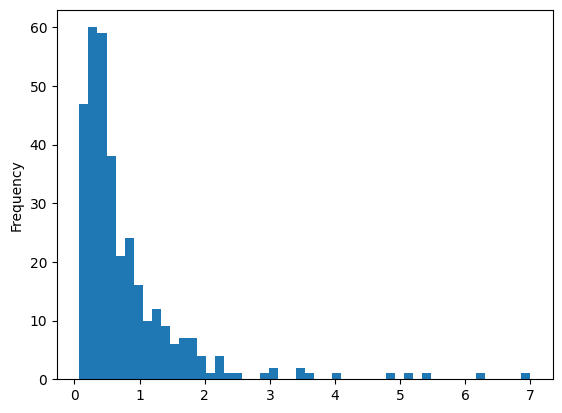

In [66]:
#Distribution of diameters of Potentially Hazardous
data = dataset[dataset['pha']=='Y']
data['diameter'].plot.hist(bins=50)

In [67]:
#Potentially hazardous and bigest objects
dataset.loc[(dataset['diameter'] > 1) & (dataset['pha']=='Y')]

,spkid,full_name,pdes,name,prefix,neo,pha,sats,H,G,...,rms,two_body,A1,A1_sigma,A2,A2_sigma,A3,A3_sigma,DT,DT_sigma
7,20001620,1620 Geographos (1951 RA),1620,Geographos,NaN,Y,Y,0,15.27,NaN,...,0.29384,NaN,NaN,NaN,-3.700000e-15,2.400000e-16,NaN,NaN,NaN,NaN
10,20001862,1862 Apollo (1932 HA),1862,Apollo,NaN,Y,Y,1,16.08,0.09,...,0.46463,NaN,NaN,NaN,-3.700000e-15,2.000000e-16,NaN,NaN,NaN,NaN
20,20001981,1981 Midas (1973 EA),1981,Midas,NaN,Y,Y,0,15.28,NaN,...,0.45874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,20002102,2102 Tantalus (1975 YA),2102,Tantalus,NaN,Y,Y,0,16.00,NaN,...,0.38887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,20002201,2201 Oljato (1947 XC),2201,Oljato,NaN,Y,Y,0,15.36,NaN,...,0.51211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9292,3605577,(2012 LZ1),2012 LZ1,NaN,NaN,Y,Y,0,19.91,NaN,...,0.27345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12843,3720846,(2015 KL157),2015 KL157,NaN,NaN,Y,Y,0,18.68,NaN,...,0.29657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13822,3740928,(2016 BZ14),2016 BZ14,NaN,NaN,Y,Y,0,18.44,NaN,...,0.38550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14762,3757001,(2016 PR8),2016 PR8,NaN,NaN,Y,Y,0,18.90,NaN,...,0.43263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# List of columns to check for missing values
numeric_columns = ['H', 'diameter', 'albedo', 'rot_per', 'e', 'a', 'q', 'i', 'om', 'w', 'ma']

# Count missing values for each column
missing_values_count = dataset[numeric_columns].isnull().sum()
print(missing_values_count)

H            22
diameter      0
albedo       60
rot_per     788
e             0
a             0
q             0
i             0
om            0
w             0
ma            0
dtype: int64


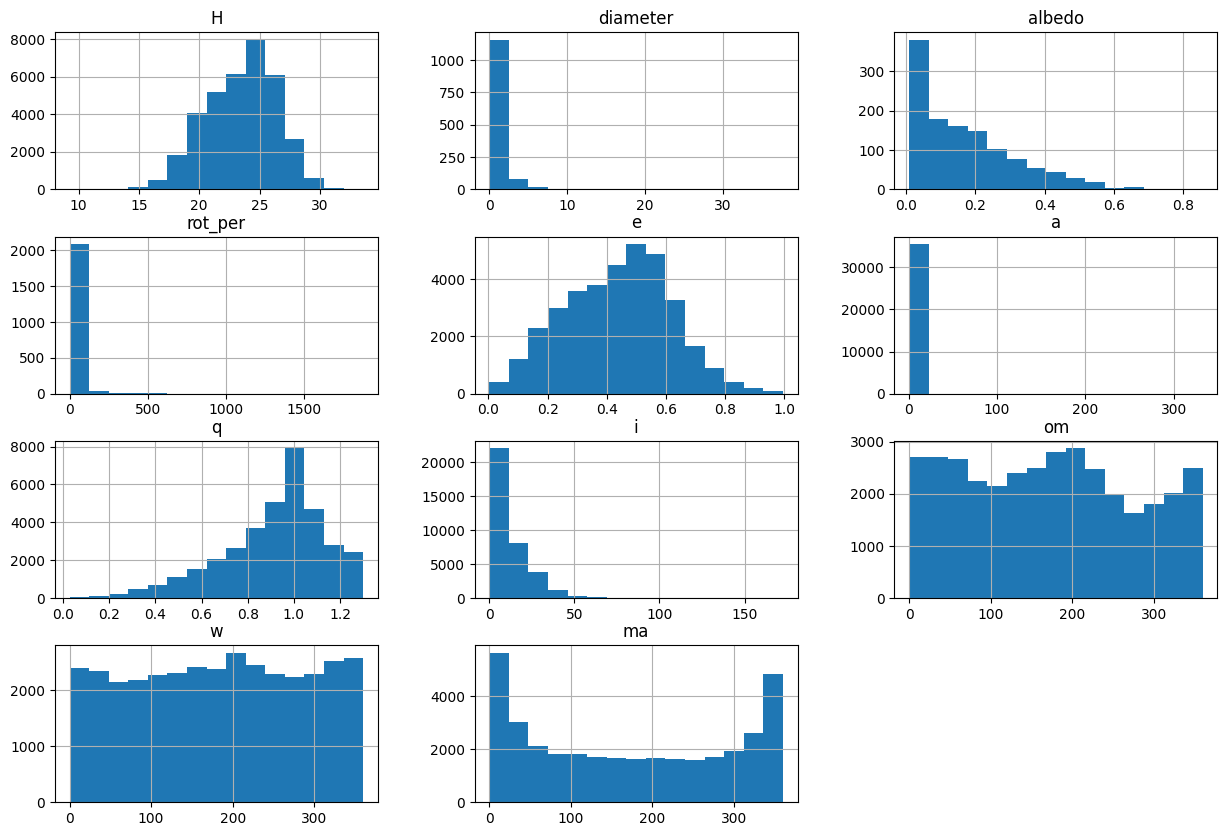

In [3]:
# Histogram for each numeric feature
# 'dataset[numeric_column]' extracts the subsey of the dataset which contains only the columns listed in the numeric_columns
#  'bins' defines the number of intervels
# 'figsize' defines the size of the histogram
dataset[numeric_columns].hist(bins=15, figsize=(15, 10))
# 'plt.show' displays the generated histogram
plt.show()

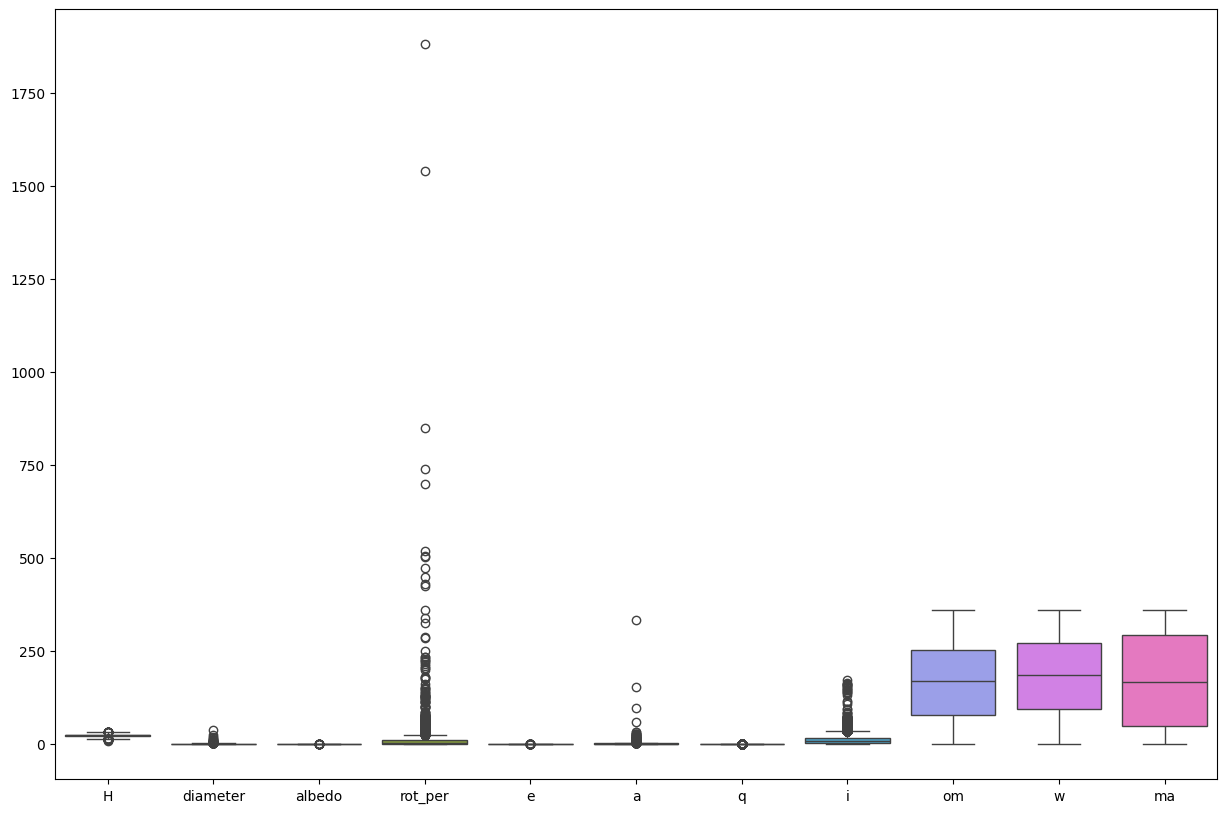

In [4]:
# Boxplot for numeric features
# 'plt.figure' used to define the size of the figure
plt.figure(figsize=(15, 10))
# 'sns.boxplot' used to create the box of each columns defined in the numeric_columns
sns.boxplot(data=dataset[numeric_columns])
# 'plt.show' displays the boxplot
plt.show()

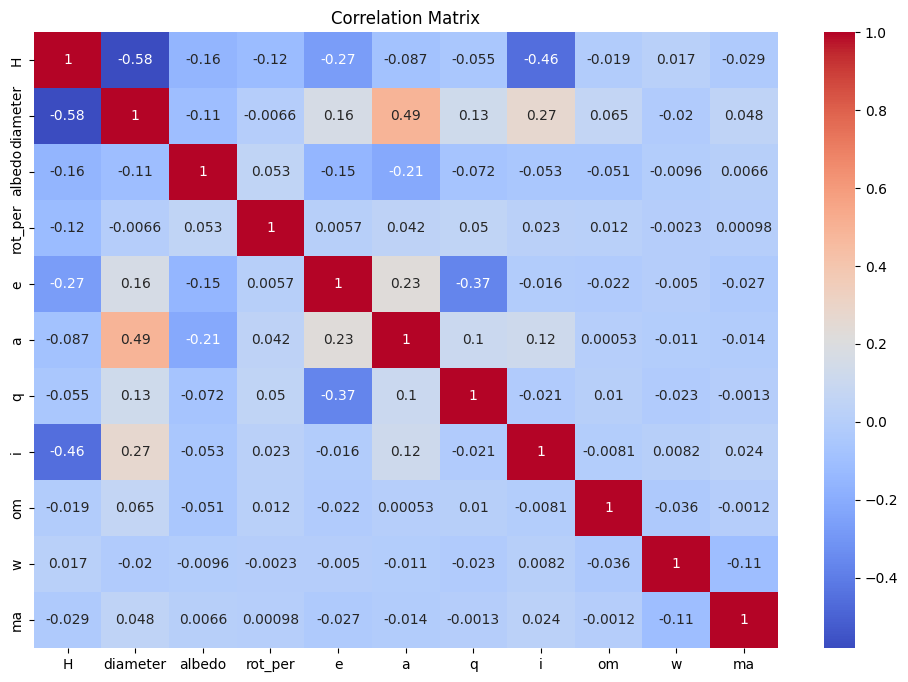

In [5]:
# Correlation Matrix Heatmap
# 'plt.figure' used to define the size of the figure
plt.figure(figsize=(12, 8))
# 'dataset[numeric_columns].corr()' used to calculate the correlation matrix for the numeric columns in the dataset
# 'annot=True' used to making it easier to see the exact values.
# 'cmap='coolwarm' defines the color for example blue for negative correlation and red for positive correlation
sns.heatmap(dataset[numeric_columns].corr(), annot=True, cmap='coolwarm')
# 'plt.title()' defines the title for the figure
plt.title('Correlation Matrix')
plt.show()

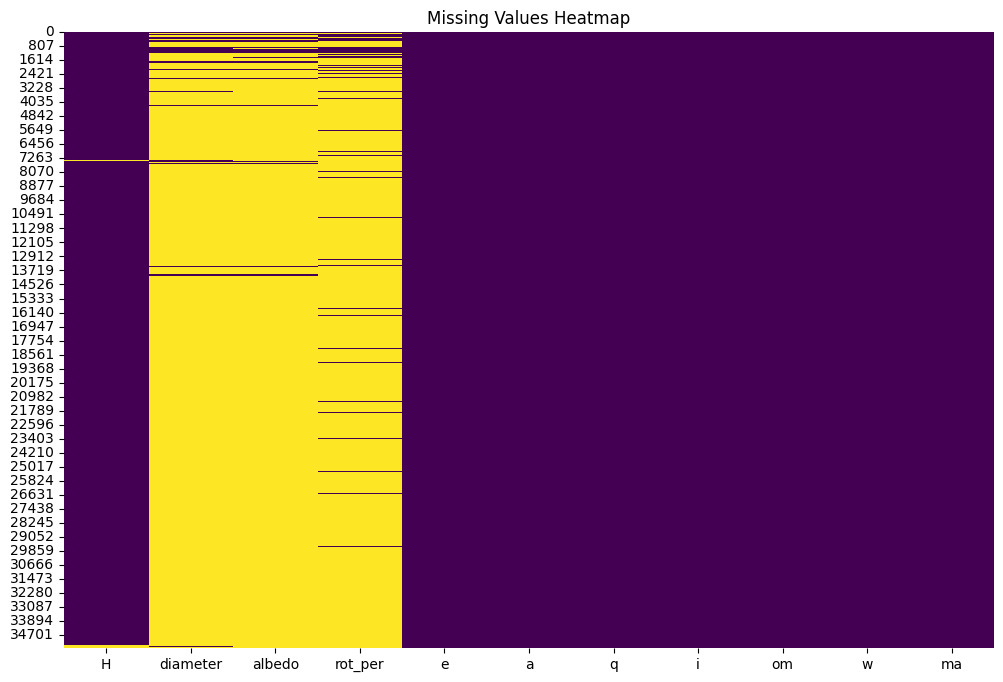

In [6]:
# Missing Values Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dataset[numeric_columns].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
# Handling missing values
dataset = dataset.dropna(subset=['diameter']).copy()
for column in numeric_columns:
    dataset.loc[:, column].fillna(dataset[column].mean(), inplace=True)

In [83]:
# Checking again are there any values still missing
missing_values_count = dataset[numeric_columns].isnull().sum()
print(missing_values_count)

H           0
diameter    0
albedo      0
rot_per     0
e           0
a           0
q           0
i           0
om          0
w           0
ma          0
dtype: int64


In [85]:
# Display the first few rows of the dataset after handling the missing values
dataset.head()

,spkid,full_name,pdes,name,prefix,neo,pha,sats,H,G,...,rms,two_body,A1,A1_sigma,A2,A2_sigma,A3,A3_sigma,DT,DT_sigma
0,20000433,433 Eros (A898 PA),433,Eros,NaN,Y,N,0,10.41,0.46,...,0.29796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20000887,887 Alinda (A918 AA),887,Alinda,NaN,Y,N,0,13.88,-0.12,...,0.43883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20001036,1036 Ganymed (A924 UB),1036,Ganymed,NaN,Y,N,0,9.25,0.30,...,0.32253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20001221,1221 Amor (1932 EA1),1221,Amor,NaN,Y,N,0,17.38,NaN,...,0.45236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20001566,1566 Icarus (1949 MA),1566,Icarus,NaN,Y,Y,0,16.57,NaN,...,0.37418,NaN,NaN,NaN,-3.600000e-15,3.000000e-16,NaN,NaN,NaN,NaN


In [69]:
# Count missing values per column after handling missing values
missing_values_count = dataset.isnull().sum()
print("Missing values per column")
print(missing_values_count)

Missing values per column
spkid           0
full_name       0
pdes            0
name         1145
prefix       1246
             ... 
A2_sigma     1131
A3           1256
A3_sigma     1256
DT           1259
DT_sigma     1259
Length: 79, dtype: int64


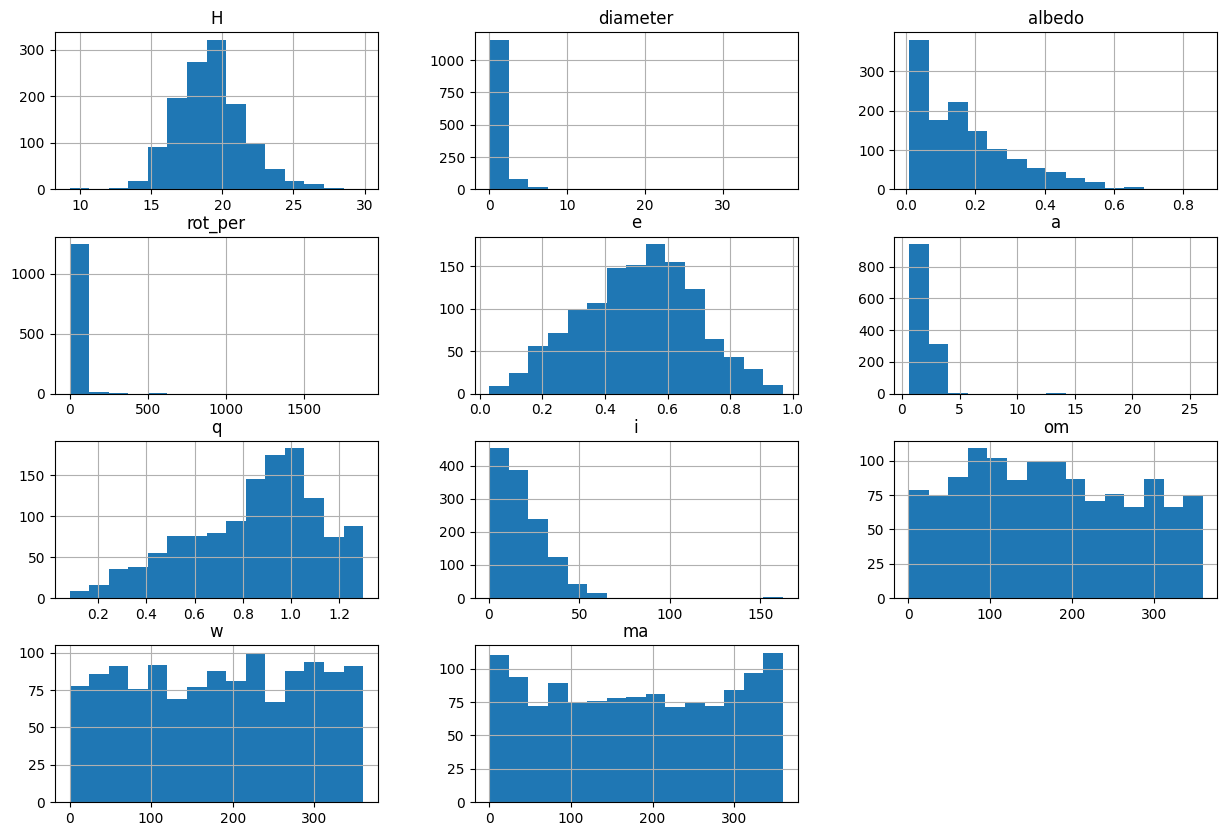

In [8]:
# Histogram after filling missing values
dataset[numeric_columns].hist(bins=15, figsize=(15, 10))
plt.show()

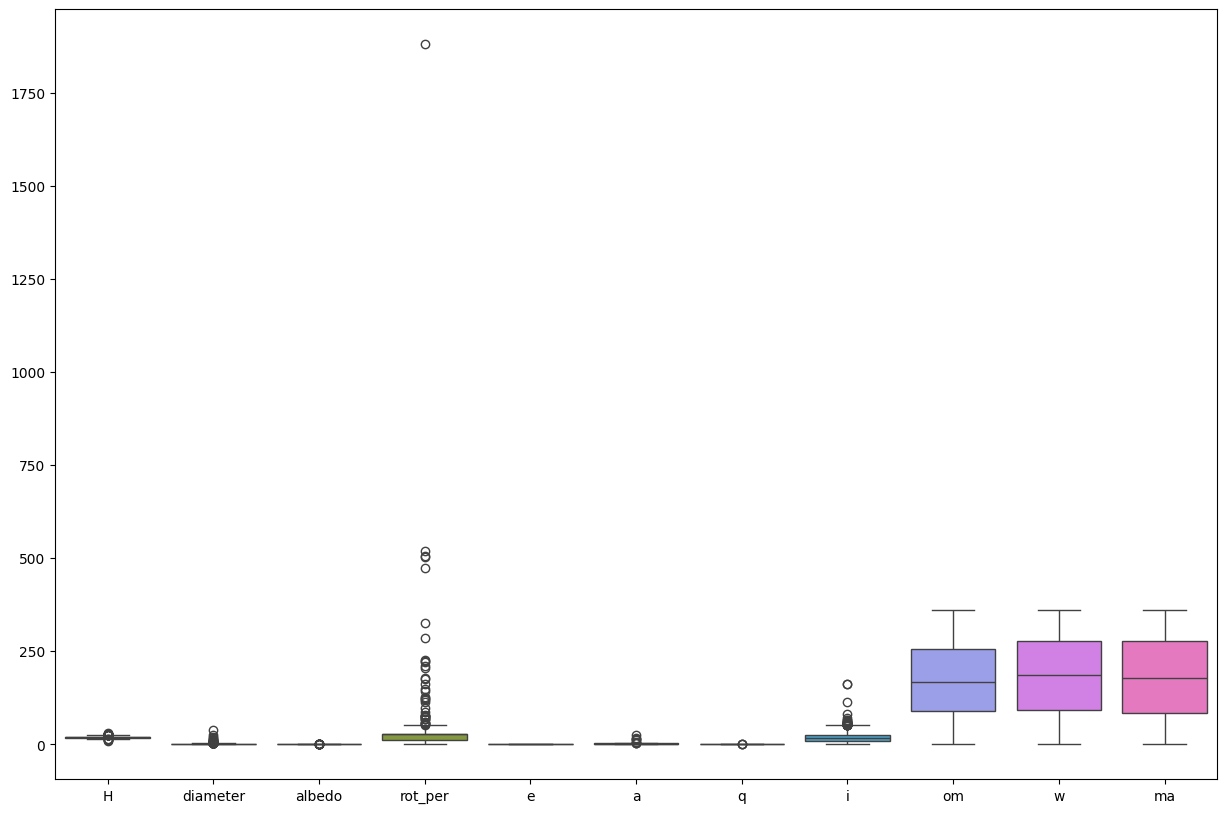

In [9]:
# Boxplot after filling missing values
plt.figure(figsize=(15, 10))
sns.boxplot(data=dataset[numeric_columns])
plt.show()

In [12]:
# Feature Selection
features = ['H', 'albedo', 'rot_per', 'e', 'a', 'q', 'i', 'om', 'w', 'ma']
X = dataset[features]
y = dataset['diameter']

In [11]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Model Initializtion
linear_model = LinearRegression()
lasso_model = Lasso(alpha=1.0)
random_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [14]:
# Model Training
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
random_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_random = random_model.predict(X_test)

In [86]:
# Evaluation
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name}')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}\n')

evaluate_model(y_test, y_pred_linear, 'Linear Regression')
evaluate_model(y_test, y_pred_lasso, 'Lasso Regression')
evaluate_model(y_test, y_pred_random, 'Random Forest')

Linear Regression
Mean Squared Error: 0.6122993494929934
Mean Absolute Error: 0.5266669921812939
R-squared: 0.5933413392042706

Lasso Regression
Mean Squared Error: 0.9224334070179356
Mean Absolute Error: 0.6084366647528364
R-squared: 0.38736578067285976

Random Forest
Mean Squared Error: 0.2448978283482206
Mean Absolute Error: 0.20721924901185756
R-squared: 0.8373510881722577



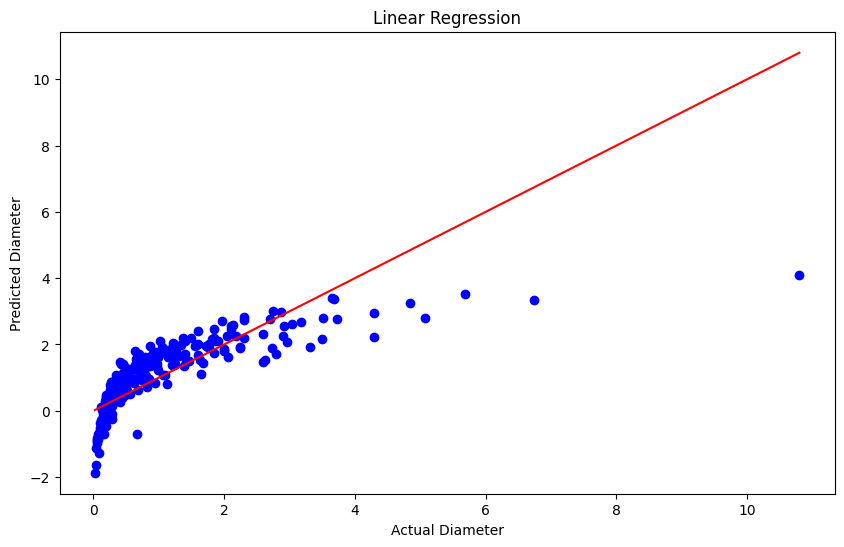

In [20]:
# Actual vs Predicted Plot (Linear Regression)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue')
plt.xlabel('Actual Diameter')
plt.ylabel('Predicted Diameter')
plt.title('Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

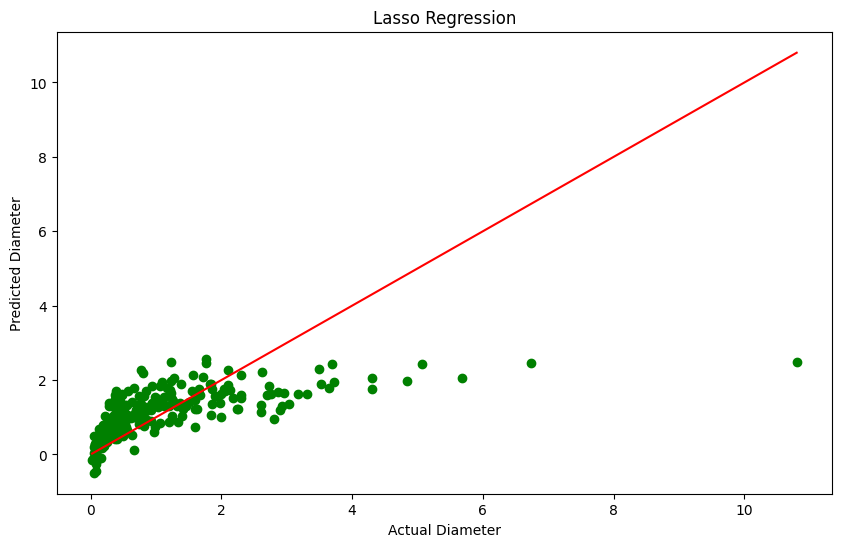

In [21]:
# Actual vs Predicted Plot (Lasso Regression)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='green')
plt.xlabel('Actual Diameter')
plt.ylabel('Predicted Diameter')
plt.title('Lasso Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

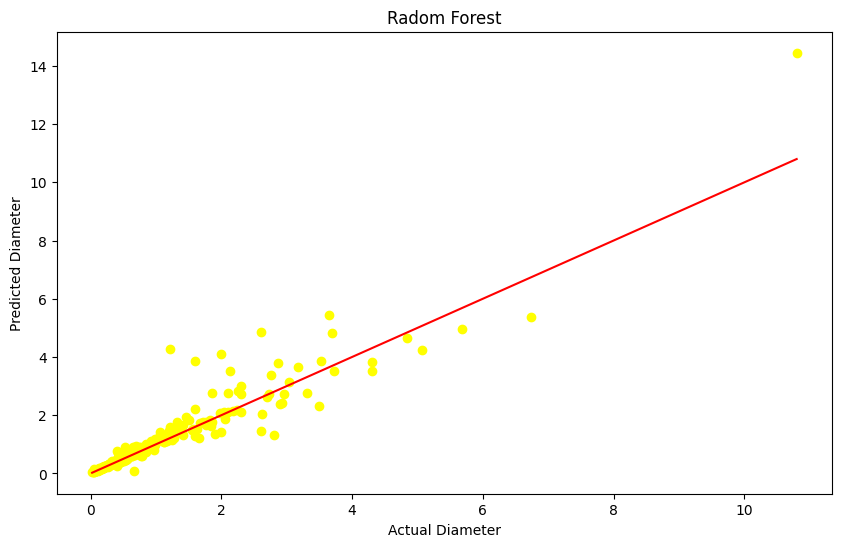

In [22]:
# Actual vs Predicted Plot (Radom Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_random, color='yellow')
plt.xlabel('Actual Diameter')
plt.ylabel('Predicted Diameter')
plt.title('Radom Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

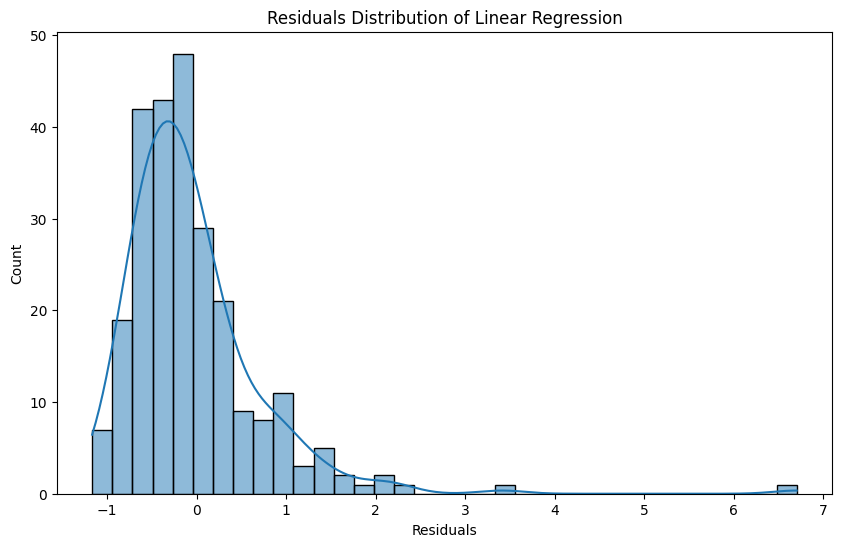

In [23]:
# Residual Plot (Linear Regression)
residuals = y_test - y_pred_linear
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution of Linear Regression')
plt.show()

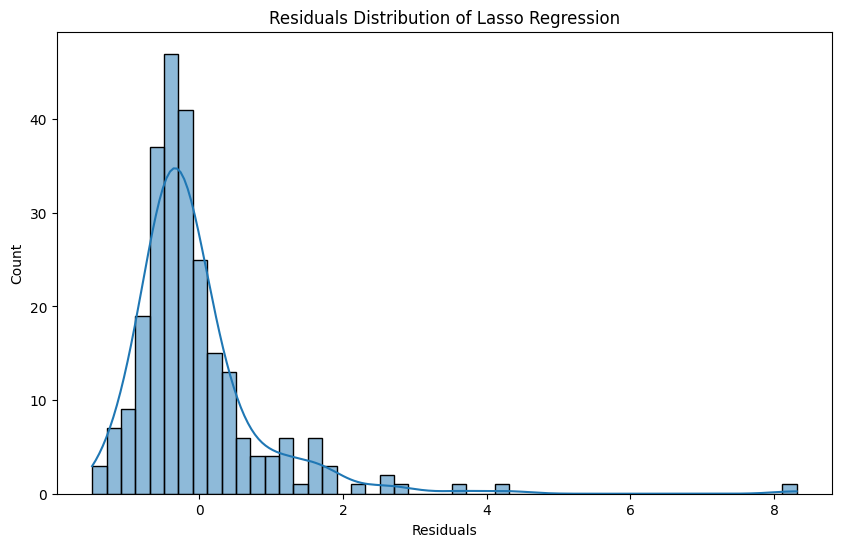

In [24]:
# Residual Plot (Lasso Regression)
residuals = y_test - y_pred_lasso
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution of Lasso Regression')
plt.show()

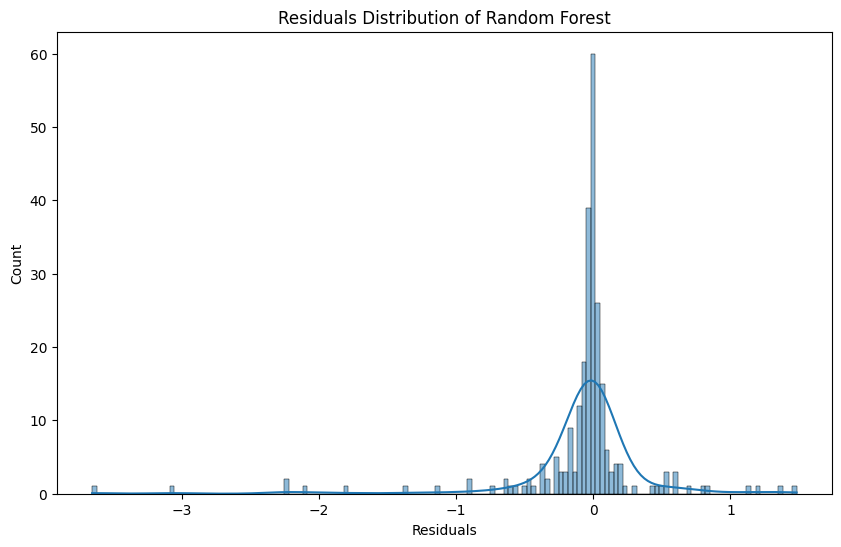

In [25]:
# Residual Plot (Random Forest)
residuals = y_test - y_pred_random
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution of Random Forest')
plt.show()

In [88]:
# Feature Importance for Linear Regression
coefficients = linear_model.coef_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': coefficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print('Feature Importance for Linear Regression')
print(feature_importance)

Feature Importance for Linear Regression
   Feature  Importance
4        a    1.023817
9       ma    0.000919
7       om    0.000151
8        w   -0.000136
2  rot_per   -0.000561
6        i   -0.010966
0        H   -0.443936
5        q   -1.492325
1   albedo   -1.949547
3        e   -3.223706


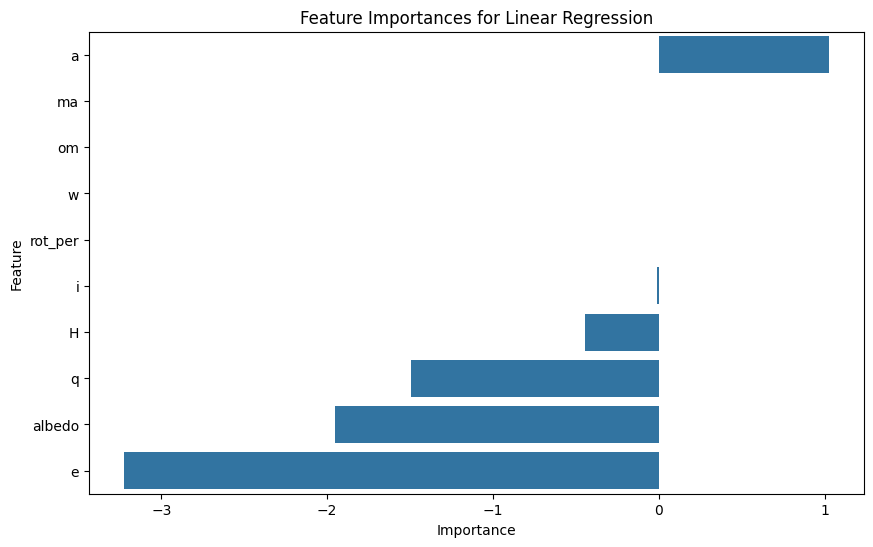

In [89]:
# Plot feature importances for Linear Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importances for Linear Regression')
plt.show()

In [91]:
# Feature Importance for Lasso Regression
coefficients = lasso_model.coef_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': coefficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print('Feature Importance for Lasso Regression')
print(feature_importance)

Feature Importance for Lasso Regression
   Feature  Importance
4        a    0.070270
6        i    0.022595
9       ma    0.000564
7       om    0.000402
1   albedo   -0.000000
2  rot_per   -0.000000
3        e    0.000000
5        q    0.000000
8        w   -0.000127
0        H   -0.188421


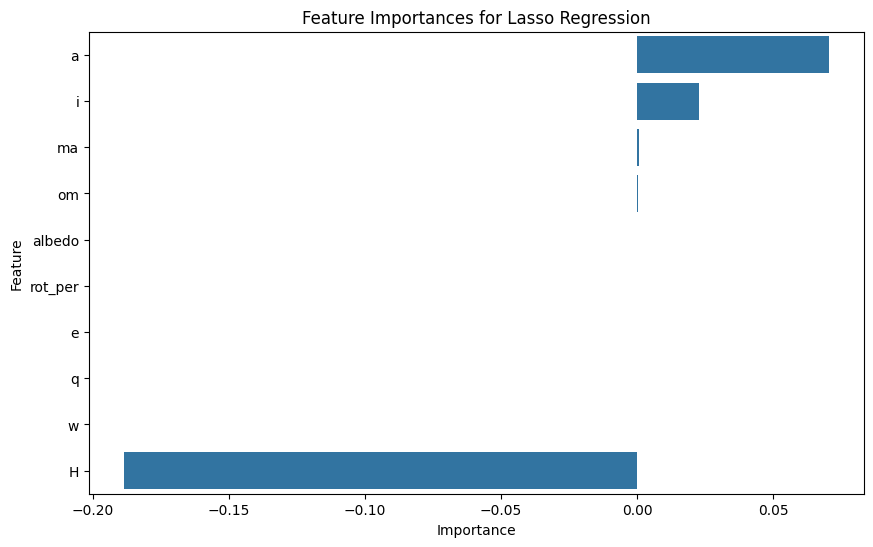

In [92]:
# Plot feature importances for Lasso Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importances for Lasso Regression')
plt.show()

In [94]:
# Feature Importance for Random Forest
importances = random_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


print('Feature Importance for Random Forest')
print(feature_importance)

Feature Importance for Random Forest
   Feature  Importance
0        H    0.604833
4        a    0.212176
1   albedo    0.059077
3        e    0.038417
8        w    0.020769
6        i    0.020323
2  rot_per    0.019405
9       ma    0.008641
5        q    0.008419
7       om    0.007939


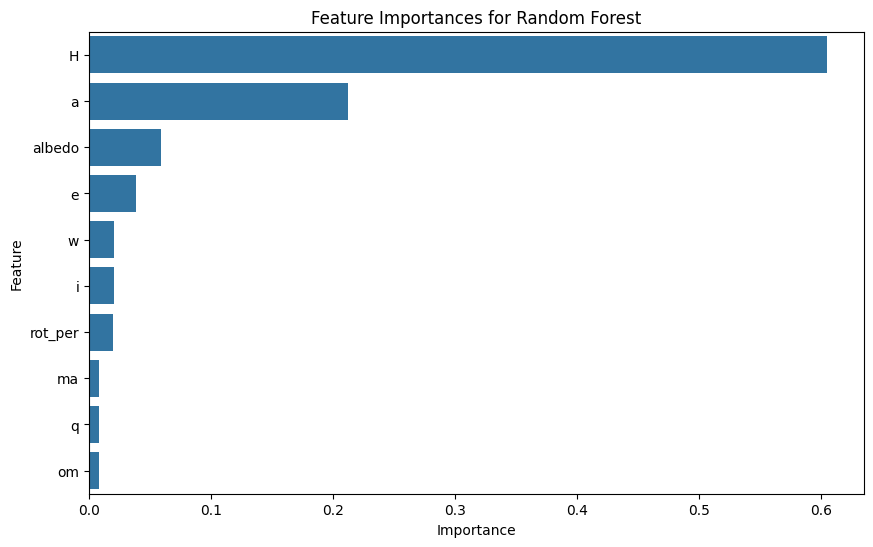

In [95]:
# Plot feature importances for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importances for Random Forest')
plt.show()

In [42]:
# Hyperparameter Tuning using RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [43]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=random_model, param_distributions=param_grid,
                                   n_iter=100, cv=5, verbose=2, random_state=42,
                                   n_jobs=-1, scoring='neg_mean_squared_error')

In [44]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
# Get best parameters and best score
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}


In [48]:
# Evaluate the best model
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [49]:
# Evaluate on Test Set
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Mean Squared Error (Tuned): {mse_best}')
print(f'Mean Absolute Error (Tuned): {mae_best}')
print(f'R-squared (Tuned): {r2_best}')

Mean Squared Error (Tuned): 0.2012339002080048
Mean Absolute Error (Tuned): 0.19544982671228023
R-squared (Tuned): 0.8663504894574037


In [98]:
# New Data Prediction
new_data = [[16.84, 0.25, 5.27, 4.46E-04, 0.921, 0.531, 10.83, 304.28, 178.9, 334.73]]
new_data_df = pd.DataFrame(new_data, columns=features)
prediction = random_model.predict(new_data_df)
print(f'Predicted Diameter: {prediction[0]}')

Predicted Diameter: 1.194850000000001
